In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# import csv file
path = 'dataset/randomforest/'
df_train = pd.read_csv(path + 'ml-100k-preprocessed-train.csv')

In [3]:
X = df_train.drop((['rating']), axis = 1)
y = df_train['rating']

In [4]:
# list of column names
feature_names = list(df_train.columns)
feature_names.remove('rating')

In [5]:
# 1. feature importance using random forest

In [6]:
# initialize and fit the model
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

RandomForestClassifier(random_state=0)

In [7]:
# extract the feature importance values
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
rf_feature_importances = pd.DataFrame(
    {"feature": feature_names, "importance": forest.feature_importances_}
)

In [8]:
# giving colors for all genre for better visualization, optional
# my_colors = ['blue','green']
# my_colors.extend(['orange']*19)
# my_colors.extend(['brown','pink','gray','olive','cyan','aquamarine','gold','gold'])
# feature_importances_df['info'] = my_colors

In [9]:
rf_feature_importances.sort_values("importance", ascending=False,inplace=True)

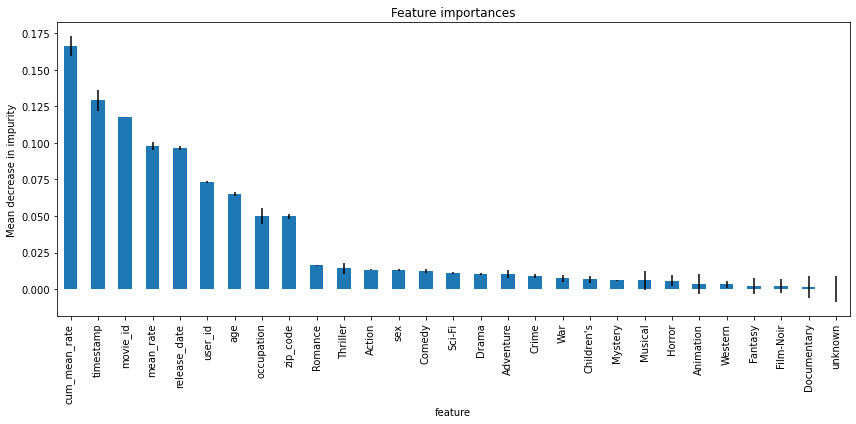

In [10]:
# visualize the importance of each feature
fig, ax = plt.subplots(figsize=(12,6))
rf_feature_importances.plot.bar(x='feature', y='importance', yerr=std, ax=ax, legend=False)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
# 2. feature importance using extra tree classifier

In [12]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X,y)

ExtraTreesClassifier()

In [13]:
# extract the feature importance values
std = np.std([tree.feature_importances_ for tree in extra_tree.estimators_], axis=0)
et_feature_importances = pd.DataFrame(
    {"feature": feature_names, "importance": extra_tree.feature_importances_}
)

In [14]:
et_feature_importances.sort_values("importance", ascending=False,inplace=True)

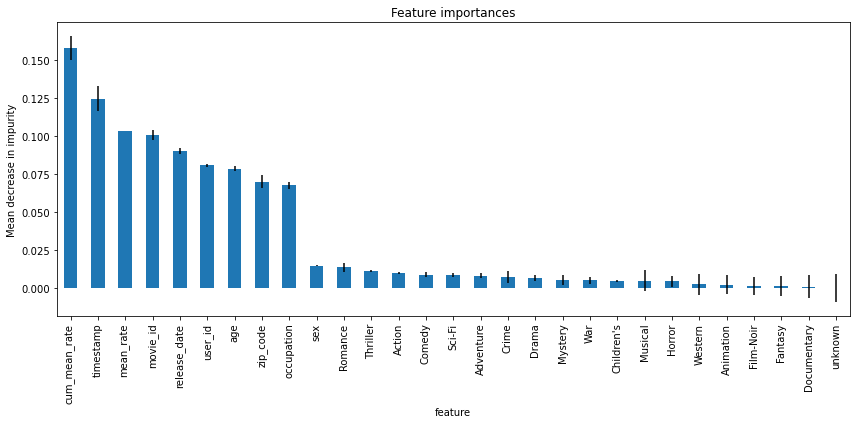

In [15]:
# visualize the importance of each feature
fig, ax = plt.subplots(figsize=(12,6))
et_feature_importances.plot.bar(x='feature', y='importance', yerr=std, ax=ax, legend=False)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# Visualizing top 10 common features for random forest and extra trees

In [44]:
common_imp_features = pd.merge(rf_feature_importances.iloc[:11], et_feature_importances.iloc[:11], how = 'inner', on = ['feature'])
common_imp_features.rename(columns={'importance_x':'random_forest_importance','importance_y':'extra_tree_importance'}, inplace=True)

<AxesSubplot:xlabel='feature'>

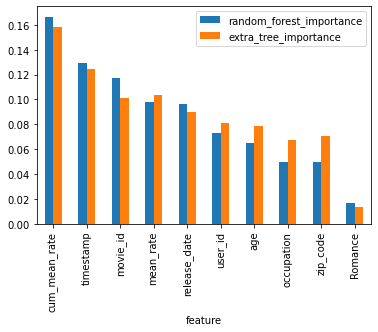

In [48]:
# visualize the importance of each feature
common_imp_features.plot.bar(x='feature', y=['random_forest_importance','extra_tree_importance'], legend=True)

In [ ]:
# both trees almost gave the same important features. These are the top 10 important features for our dataset.

In [49]:
# Analysis - Correlation matrix with heatmap

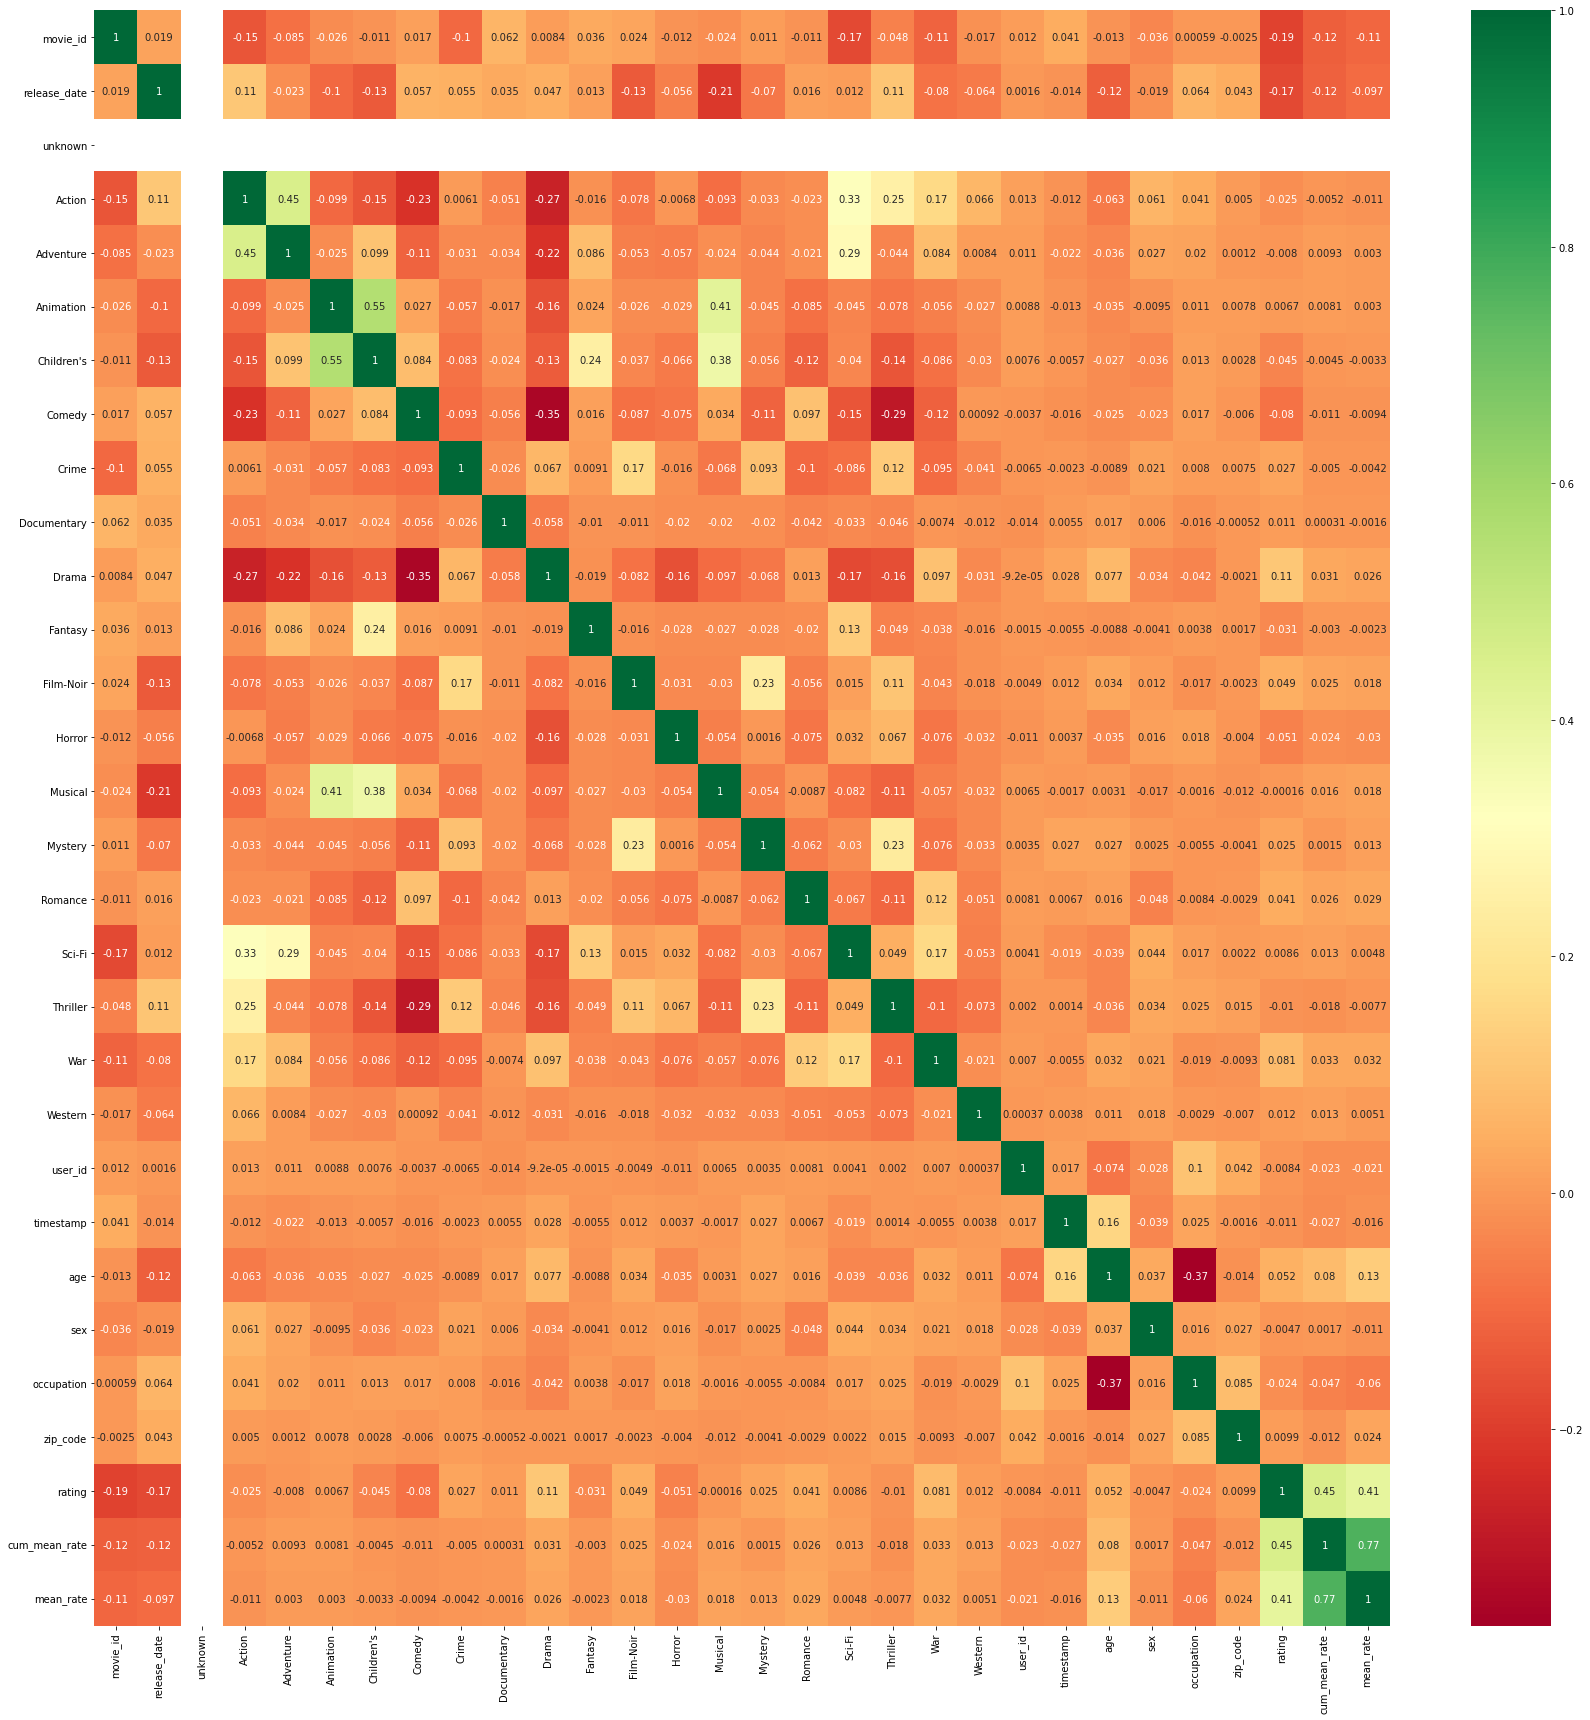

In [50]:
#get correlations of each features in dataset and plot heatmap
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(24,24))
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.tight_layout()

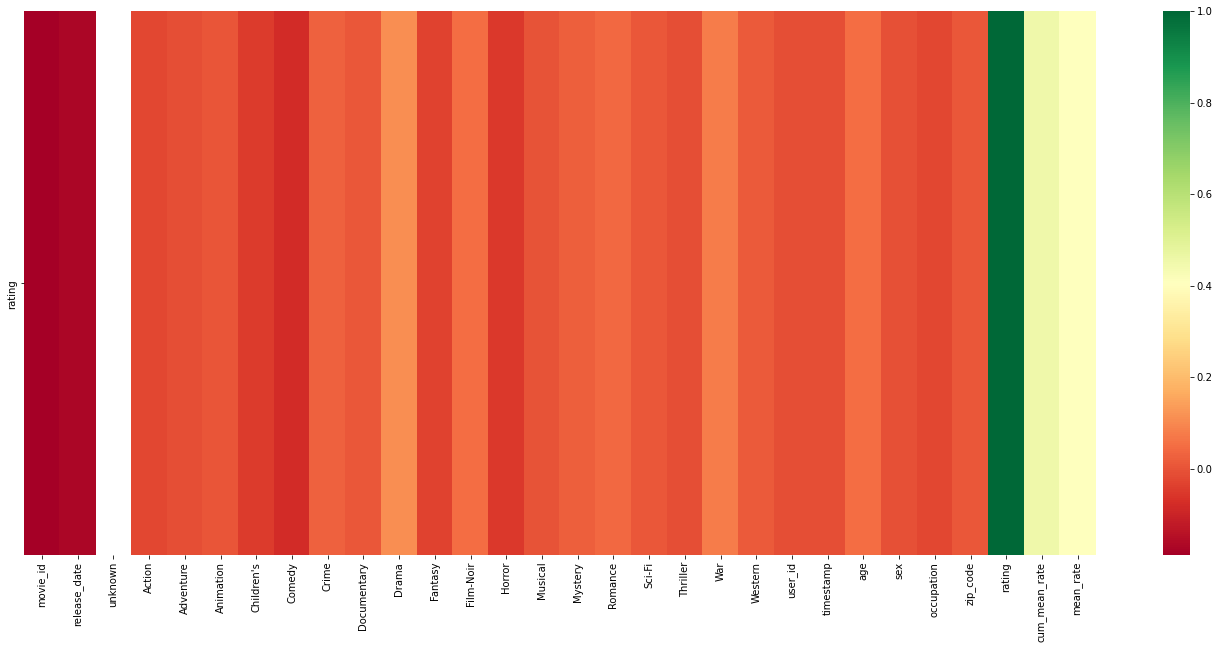

In [51]:
plt.figure(figsize=(24,10))
g2=sns.heatmap(pd.DataFrame(df_train[top_corr_features].corr().loc['rating']).T,annot=False,cmap="RdYlGn")

In [52]:
# this heatmap is to show which features are highly correlated with the output feature
# positive - increase in one value increases the target value and viceversa
# cummulative mean rating and and mean rating have high correlation with the rating. 
# this is because these features are extracted from rating. 
# movie id and release date don't have high correlation with the rating, but still those features are important. 